# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [261]:
# Libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




#sns.set_style('white')
#plt.rcParams['font.family'] = 'monospace'

#blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
#reds = ['#e61010','#e65010','#e68d10','#e6df10','#c2e610']
#cmap_blues = sns.color_palette(blues)
#cmap_reds = sns.color_palette(reds)
#sns.set_palette(cmap_blues)

#print('These are color palette I will use in it:')
#sns.palplot(cmap_blues)
#sns.palplot(cmap_reds)

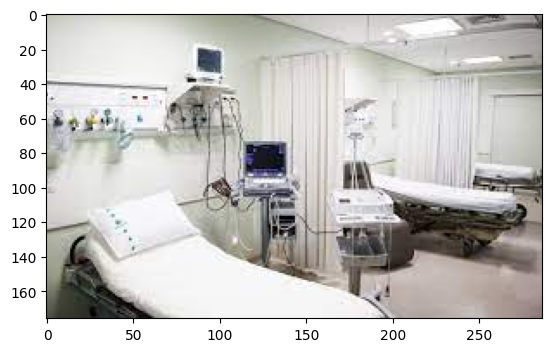

In [262]:
image = mpimg.imread('hiso.jfif')
plt.imshow(image)
plt.show()

In [263]:
# Get data
dados = pd.read_csv('hospital_readmissions.csv')
dados_original = dados.copy()
amostra = len(dados)
dados.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [264]:
#Lets take a look into de data
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [265]:
dados.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

Apparently we have all the columns complete, but are they properly filled in? let's investigate

In [266]:
# Show us all values in each column
for i in dados.columns:
    print('columns :', i, 'values: ' , np.sort(dados[i].unique()), '\n')

columns : age values:  ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)'] 

columns : time_in_hospital values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

columns : n_lab_procedures values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113] 

columns : n_procedures values:  [0 1 2 3 4 5 6] 

columns : n_medications values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79] 

columns : n_outpatient values:  [ 0  1  2  3  4  

We observe that only the columns medical_specialty, diag_1, diag_2 and diag_3 have values referring to Missing and Others.



1- Remoção de dados nulas
2- Tratamento de outliers
3- Análise de correlação
4- encoding de variáveis categóricas
5- Normalização das variáveis
6- Balanceamento na variável alvo
7- Criação do modelo de classificação
8- Avaliação do modelo

# Let's look at each variable individually

In [267]:
# Lets tranform each age group un an integer so we can apply more analises.

dic = {'[40-50)' : 0 ,
        '[50-60)' : 1,
        '[60-70)' : 2,
        '[70-80)' : 3,
        '[80-90)' : 4,
        '[90-100)': 5,

# Lets using change readmitted values as well, no to 0 and yes to 1

        'no' : 0 ,
        'yes' : 1}
dados = dados.replace(dic)

## Readmitted

<Axes: xlabel='readmitted', ylabel='Count'>

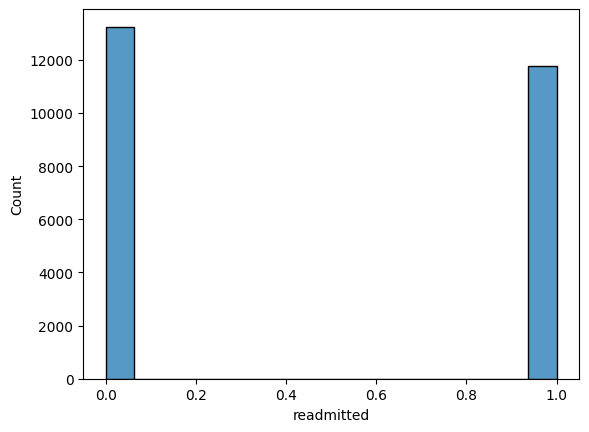

In [268]:
sns.histplot(data = dados, x = 'readmitted')

In [269]:
admitted_yes = len(dados[dados.readmitted == 1])
admitted_no = len(dados[dados.readmitted == 0])

print('We have {} total records, {}({}% of total) pacients had readmission and {} ({}% of total)stayed at home'.format(amostra,admitted_yes,round(admitted_yes/amostra,3)*100 ,admitted_no, round(admitted_no/amostra,3)*100  ))


We have 25000 total records, 11754(47.0% of total) pacients had readmission and 13246 (53.0% of total)stayed at home


Well, we have a good distribution of patients, let's now proceed to the individual analysis of each feature of our data

C:\Users\andre\AppData\Local\Temp\ipykernel_44892\1419708820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),


<Axes: >

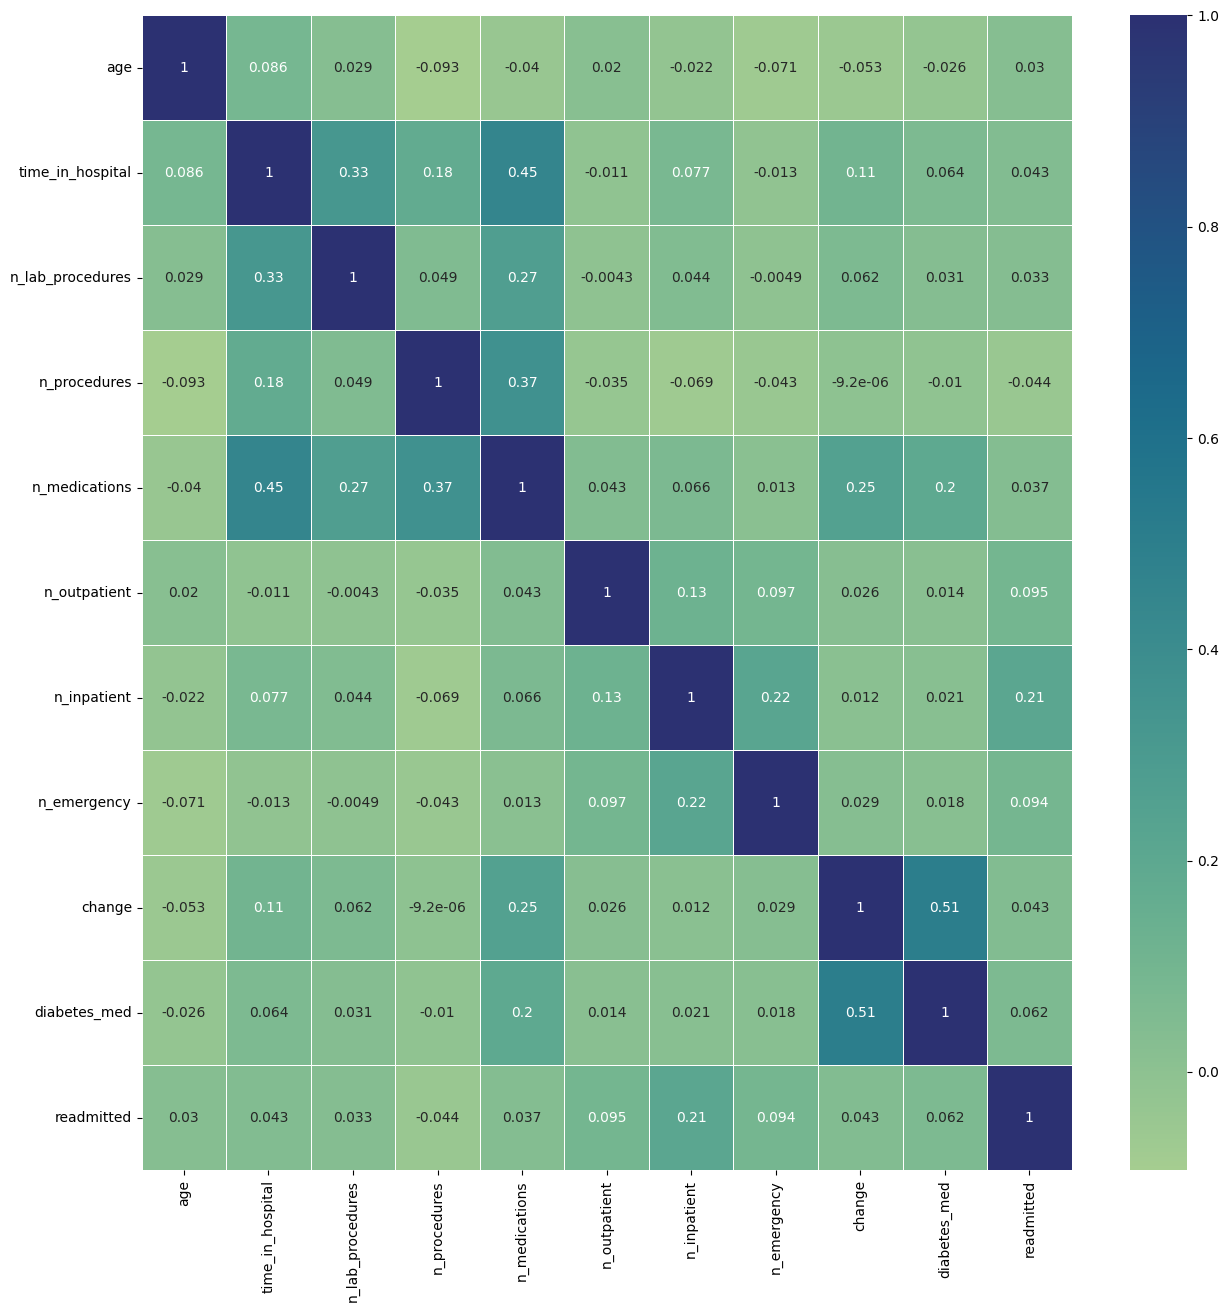

In [270]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

Regarding the variable that matters "readmitted" the only weak linear correlation we observed is with "n_inpatient", the rest apparently does not impact.

Regarding the other variables, we have some correlations that permeate common sense, such as the relationship between "change" and "diabetes_med" and "time_in_hospital" / "n_lab_procedures" / "n_procedures" / "n_procedures" which tells us that the greater the time in the hospital, the greater the amount of tests and procedures that the patient will undergo.

## Age

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

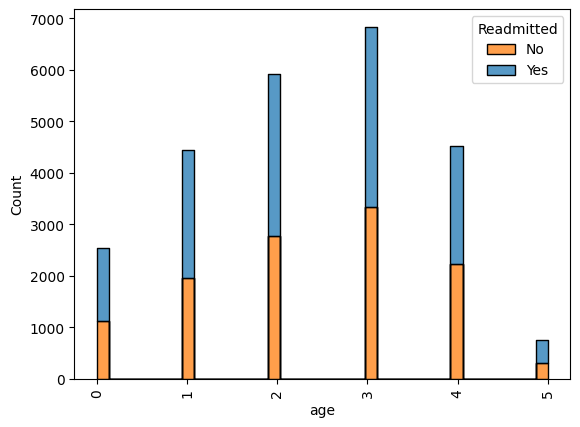

In [271]:
#age distribution
sns.histplot(data = dados, x = 'age', hue = 'readmitted', element="step", multiple="stack")
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90)


In [272]:
age = dados.groupby('age')['readmitted'].agg(['sum', 'count'])
age['readmission (%)'] = round(age['sum'] / age['count'],4)*100
age['participation (%)'] = round(age['count'] / amostra,4)*100
age

,sum,count,readmission (%),participation (%)
age,,,,
0,1127,2532,44.51,10.13
1,1966,4452,44.16,17.81
2,2770,5913,46.85,23.65
3,3336,6837,48.79,27.35
4,2239,4516,49.58,18.06
5,316,750,42.13,3.00


The younger groups have lower chances of readmission, although the older group has the lowest percentage, its participation in the total patient population is very small.

## Time in hospital

<Axes: xlabel='time_in_hospital', ylabel='Count'>

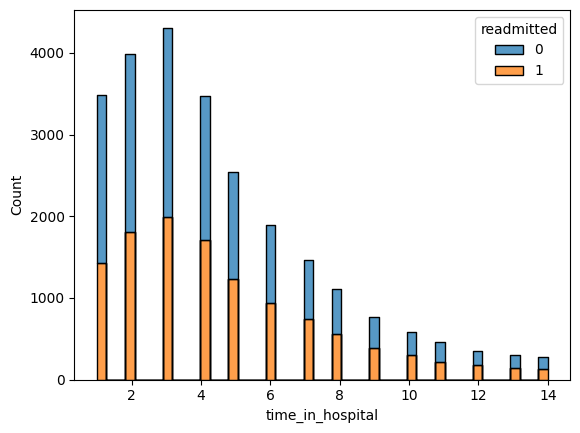

In [273]:
sns.histplot(data = dados, x = 'time_in_hospital', hue = 'readmitted', element="step", multiple="stack")

In [274]:
time_in_hospital = dados.groupby(dados.time_in_hospital // 1)['readmitted'].agg(['sum', 'count'])
time_in_hospital['readmission (%)'] = round(time_in_hospital['sum'] / time_in_hospital['count'],4)*100
time_in_hospital['participation (%)'] = round(time_in_hospital['count'] / amostra,4)*100
time_in_hospital

,sum,count,readmission (%),participation (%)
time_in_hospital,,,,
1,1426,3480,40.98,13.92
2,1806,3986,45.31,15.94
3,1989,4311,46.14,17.24
4,1713,3467,49.41,13.87
5,1228,2542,48.31,10.17
6,933,1895,49.23,7.58
7,746,1467,50.85,5.87
8,555,1104,50.27,4.42
9,391,768,50.91,3.07


In [275]:
time_in_hospital['participation (%)'][0:3].sum()

47.099999999999994

People who spend less time in the hospital are less likely to return to it, especially if they stay for up to 3 days, this grupos represents  ~47% of pacients

## Number of Labs procedures

<Axes: xlabel='n_lab_procedures', ylabel='Count'>

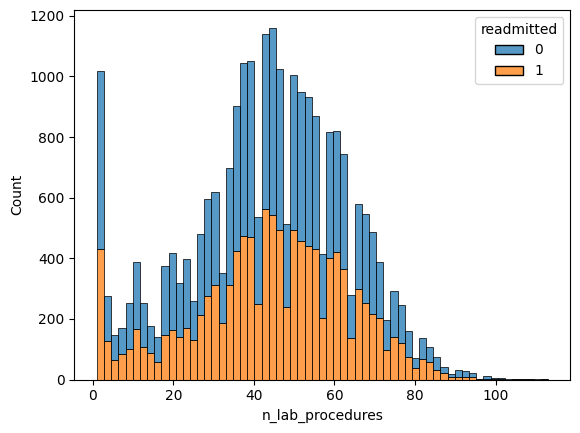

In [276]:
sns.histplot(data = dados, x = 'n_lab_procedures', hue = 'readmitted', multiple = 'stack')

In [277]:
n_lab_procedures = dados.groupby(dados.n_lab_procedures // 10)['readmitted'].agg(['sum', 'count'])
n_lab_procedures['readmission (%)'] = round(n_lab_procedures['sum'] / n_lab_procedures['count'],4)*100
n_lab_procedures['participation (%)'] = round(n_lab_procedures['count'] / amostra,4)*100
n_lab_procedures

#nada significativo

,sum,count,readmission (%),participation (%)
n_lab_procedures,,,,
0,813,1862,43.66,7.45
1,658,1576,41.75,6.30
2,1005,2227,45.13,8.91
3,1937,4155,46.62,16.62
4,2572,5407,47.57,21.63
5,2177,4463,48.78,17.85
6,1597,3246,49.20,12.98
7,732,1493,49.03,5.97
8,225,451,49.89,1.80


Explaining: As the number of exams performed is very large, we chose to group them 10 by 10, that is, group 0 represents 1 to 10, 1 represents 11 to 20... and so on. We can observe that the only numbers that call our attention are those of the last groups, but they represent 28 patients out of a universe of 25 thousand.

## Number of medical procedures

<Axes: xlabel='n_procedures', ylabel='Count'>

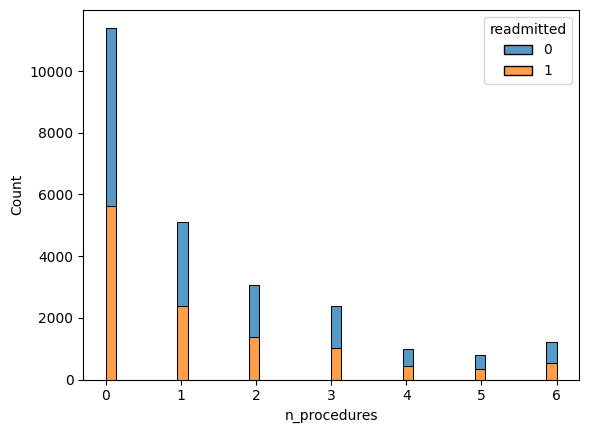

In [278]:
sns.histplot(data = dados, x = 'n_procedures', hue = 'readmitted', multiple = 'stack')

In [279]:
n_procedures = dados.groupby('n_procedures')['readmitted'].agg(['sum', 'count'])
n_procedures['readmission (%)'] = round(n_procedures['sum'] / n_procedures['count'],4)*100
n_procedures['participation (%)'] = round(n_procedures['count'] / amostra,4)*100
n_procedures

#nada significativo

,sum,count,readmission (%),participation (%)
n_procedures,,,,
0,5625,11409,49.30,45.64
1,2395,5098,46.98,20.39
2,1382,3064,45.10,12.26
3,1023,2395,42.71,9.58
4,453,999,45.35,4.00
5,352,808,43.56,3.23
6,524,1227,42.71,4.91


Nothing that stands out

<Axes: xlabel='n_procedures', ylabel='readmission (%)'>

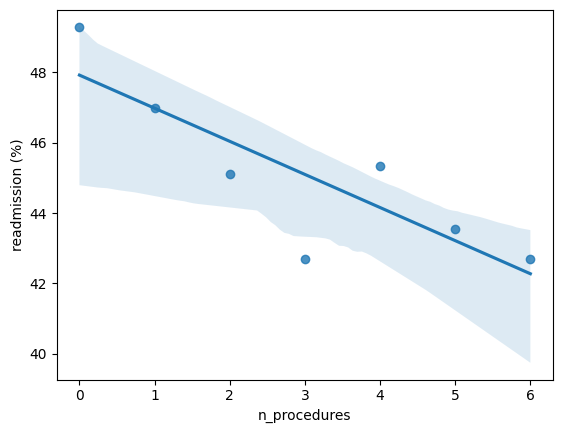

In [280]:
sns.regplot(data = n_procedures, x = n_procedures.index, y = n_procedures['readmission (%)'])

Curious pattern we observe here, the greater the amount of medical procedures that the patient goes through, the lower the chance of being readmitted

## Quantity of medications

<Axes: xlabel='n_medications', ylabel='Count'>

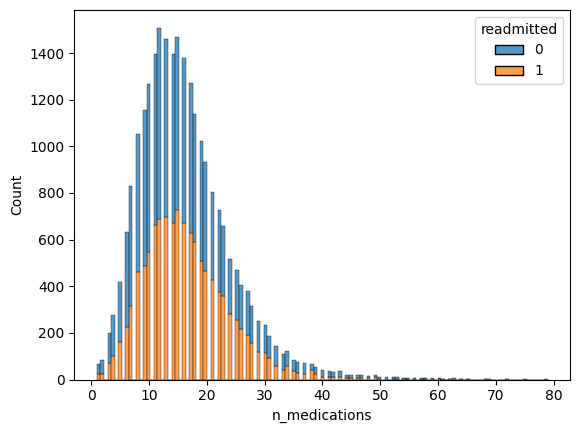

In [281]:
sns.histplot(data = dados, x = 'n_medications', hue = 'readmitted', multiple = 'stack')

In [282]:
n_medications = dados.groupby(dados.n_medications // 12)['readmitted'].agg(['sum', 'count'])
n_medications['readmission (%)'] = round(n_medications['sum'] / n_medications['count'],4)*100
n_medications['participation (%)'] = round(n_medications['count'] / amostra,4)*100
n_medications.head(30) #ajustar index

#podemos observar que os indivídos que tomam até 12 medicamentos representam 1/3 da nossa amostra e possum um retorno bem inferior ao esperado
#nada significativo

,sum,count,readmission (%),participation (%)
n_medications,,,,
0,3082,7373,41.80,29.49
1,6813,13768,49.48,55.07
2,1623,3222,50.37,12.89
3,192,488,39.34,1.95
4,31,121,25.62,0.48
5,12,25,48.00,0.10
6,1,3,33.33,0.01


In this case, we decided to organize the amount of medications taken in groups of 12. Group 0 groups patients who took 0 medicines up to 11, group 1 from 12 to 23 medications.

We can observe that the individuals who take up to 12 medications represent 1/3 of our sample and have a return rate much lower than mean

Groups 1 and 2 have an above average readmission average and what indicates us a pattern here. Let's disregard the other groups because they represent very small samples of the population

## Medical Specialty

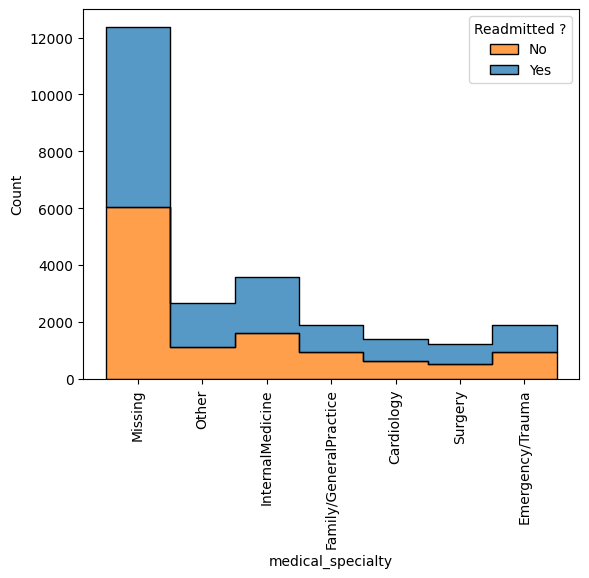

In [283]:
sns.histplot(data = dados, x = 'medical_specialty', hue = 'readmitted', element = "step", multiple = 'stack')
plt.xticks(rotation=90)
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])

In [284]:
temp = dados.groupby('medical_specialty')['readmitted'].sum()
medical_specialty = pd.DataFrame(temp)
medical_specialty['count'] = dados.groupby('medical_specialty')['readmitted'].count()

medical_specialty['readmission (%)'] = round(medical_specialty['readmitted'] / medical_specialty['count'],4)*100
medical_specialty['participation (%)'] = round(medical_specialty['count'] / amostra,4)*100


medical_specialty

,readmitted,count,readmission (%),participation (%)
medical_specialty,,,,
Cardiology,634,1409,45.00,5.64
Emergency/Trauma,931,1885,49.39,7.54
Family/GeneralPractice,932,1882,49.52,7.53
InternalMedicine,1596,3565,44.77,14.26
Missing,6056,12382,48.91,49.53
Other,1105,2664,41.48,10.66
Surgery,500,1213,41.22,4.85


## Medical diagnosis

C:\Users\andre\AppData\Local\Temp\ipykernel_44892\3081727386.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


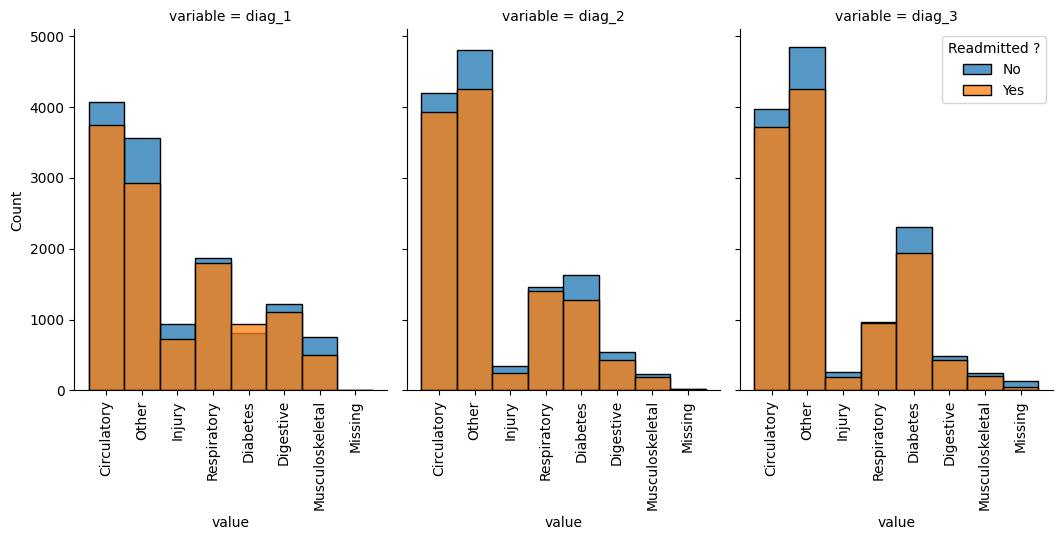

In [285]:

temp = pd.melt(dados, id_vars = ['readmitted'], value_vars = ['diag_1', 'diag_2', 'diag_3'])
g = sns.FacetGrid(temp, col = 'variable',  height = 5.5, aspect = 0.65, hue = 'readmitted')
g.map(sns.histplot, 'value', multiple = 'dodge')
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

### Primary diagnosis

In [286]:

diag_1 = dados.groupby(dados.diag_1)['readmitted'].agg(['sum', 'count'])
diag_1['readmission (%)'] = round(diag_1['sum'] / diag_1['count'],4)*100
diag_1['participation (%)'] = round(diag_1['count'] / amostra,4)*100
diag_1

,sum,count,readmission (%),participation (%)
diag_1,,,,
Circulatory,3750,7824,47.93,31.30
Diabetes,937,1747,53.63,6.99
Digestive,1105,2329,47.45,9.32
Injury,727,1666,43.64,6.66
Missing,2,4,50.00,0.02
Musculoskeletal,495,1252,39.54,5.01
Other,2932,6498,45.12,25.99
Respiratory,1806,3680,49.08,14.72


Well, it seems to us that patients who have 'Musculoskeletal' and 'Injury' problems have the lowest return rate, whereas 'Diabetes' are the group that is readmitted the most

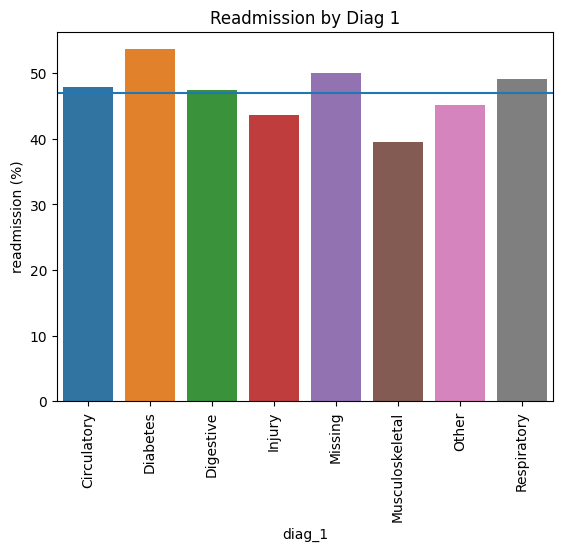

In [288]:
graph = sns.barplot(data = diag_1, x = diag_1.index, y = 'readmission (%)')
graph.axhline(47)
graph.set(title = 'Readmission by Diag 1')
plt.xticks(rotation=90)
plt.show()

In [289]:


diag_2 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_2['readmission (%)'] = round(diag_2['sum'] / diag_2['count'],4)*100
diag_2['participation (%)'] = round(diag_2['count'] / amostra,4)*100
diag_2

,sum,count,readmission (%),participation (%)
diag_2,,,,
Circulatory,3932,8134,48.34,32.54
Diabetes,1283,2906,44.15,11.62
Digestive,431,973,44.30,3.89
Injury,240,591,40.61,2.36
Missing,17,42,40.48,0.17
Musculoskeletal,197,426,46.24,1.70
Other,4248,9056,46.91,36.22
Respiratory,1406,2872,48.96,11.49


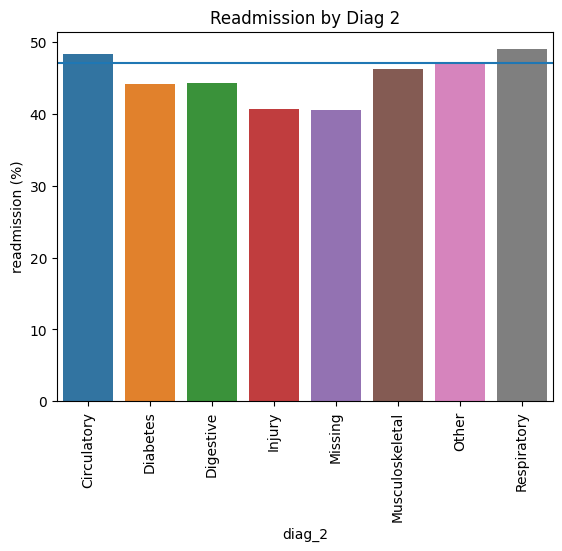

In [291]:
graph = sns.barplot(data = diag_2, x = diag_2.index, y = 'readmission (%)')
graph.axhline(47)
graph.set(title = 'Readmission by Diag 2')
plt.xticks(rotation=90)
plt.show()

In [292]:


diag_3 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_3['readmission (%)'] = round(diag_3['sum'] / diag_3['count'],4)*100
diag_3['participation (%)'] = round(diag_3['count'] / amostra,4)*100
diag_3

,sum,count,readmission (%),participation (%)
diag_2,,,,
Circulatory,3932,8134,48.34,32.54
Diabetes,1283,2906,44.15,11.62
Digestive,431,973,44.30,3.89
Injury,240,591,40.61,2.36
Missing,17,42,40.48,0.17
Musculoskeletal,197,426,46.24,1.70
Other,4248,9056,46.91,36.22
Respiratory,1406,2872,48.96,11.49


In 'diag_2' and 'diag_3', we have additional information to 'diag_1', in both we have more than 1/3 of the cases as 'Other'. It is surprising how 'Circulatory' has a great participation in all diagnoses.

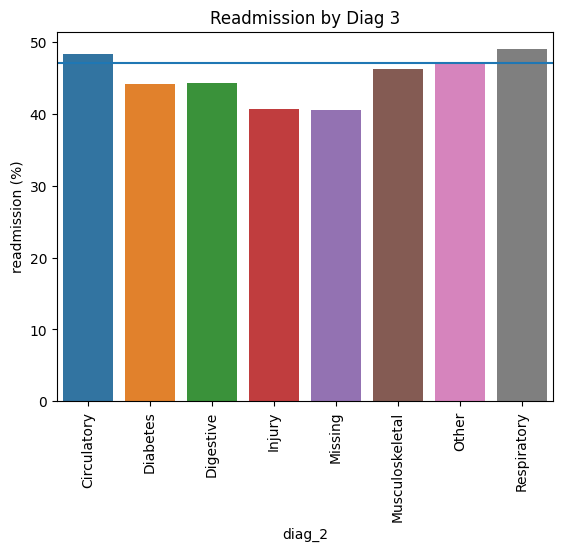

In [293]:
graph = sns.barplot(data = diag_3, x = diag_3.index, y = 'readmission (%)')
graph.axhline(47)
graph.set(title = 'Readmission by Diag 3')
plt.xticks(rotation=90)
plt.show()

In [295]:


glucose_test = dados.groupby('glucose_test')['readmitted'].agg(['sum', 'count'])
glucose_test['readmission (%)'] = round(glucose_test['sum'] / glucose_test['count'],4)*100
glucose_test['participation (%)'] = round(glucose_test['count'] / amostra,4)*100
glucose_test.sort_values(by = ['participation (%)'], ascending = False)



,sum,count,readmission (%),participation (%)
glucose_test,,,,
0,11064,23625,46.83,94.50
normal,333,689,48.33,2.76
high,357,686,52.04,2.74


Patients with a high 'glucose_test' are more likely to return

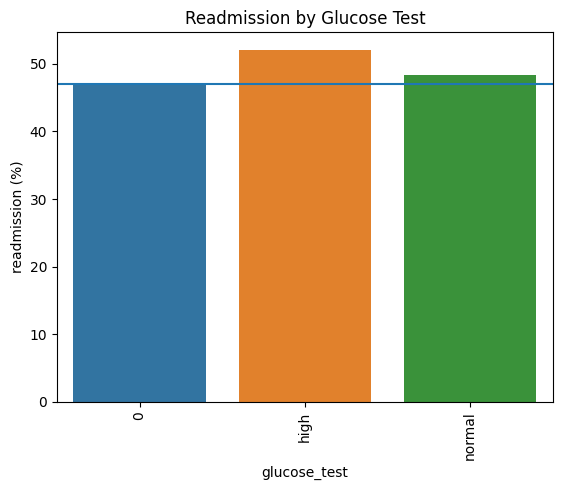

In [297]:
graph = sns.barplot(data = glucose_test, x = glucose_test.index, y = 'readmission (%)')
graph.axhline(47)
graph.set(title = 'Readmission by Glucose Test')
plt.xticks(rotation=90)
plt.show()

In [299]:


A1Ctest = dados.groupby('A1Ctest')['readmitted'].agg(['sum', 'count'])
A1Ctest['readmission (%)'] = round(A1Ctest['sum'] / A1Ctest['count'],4)*100
A1Ctest['participation (%)'] = round(A1Ctest['count'] / amostra,4)*100
A1Ctest.sort_values(by = ['participation (%)'], ascending = False)



,sum,count,readmission (%),participation (%)
A1Ctest,,,,
0,9935,20938,47.45,83.75
high,1299,2827,45.95,11.31
normal,520,1235,42.11,4.94


most patients do not have an A1CTest indicator

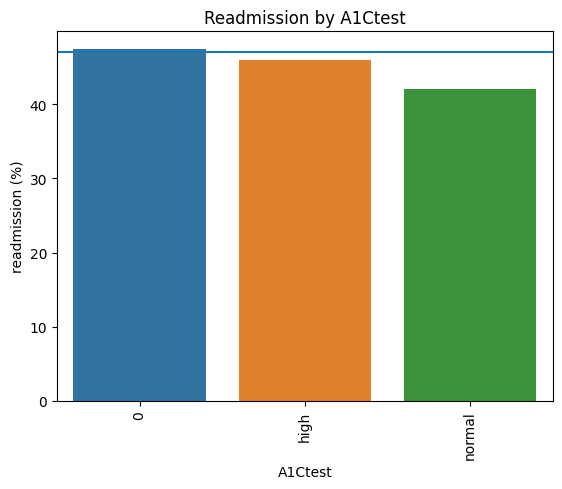

In [318]:
graph = sns.barplot(data = A1Ctest, x = A1Ctest.index, y = 'readmission (%)')
graph.axhline(47)
graph.set(title = 'Readmission by A1Ctest')
plt.xticks(rotation=90)
plt.show()

In [319]:

diabetes_med = dados.groupby(['diabetes_med', 'change'])['readmitted'].agg(['sum', 'count'])
diabetes_med['readmission (%)'] = round(diabetes_med['sum'] / diabetes_med['count'],4)*100
diabetes_med['participation (%)'] = round(diabetes_med['count'] / amostra,4)*100
diabetes_med.sort_values(by = ['readmission (%)'], ascending = False)



sum  count  readmission (%)  participation (%)
diabetes_med change                                                 
1            1       5677  11503            49.35              46.01
             0       3690   7725            47.77              30.90
0            0       2387   5772            41.35              23.09

We decided to merge 'diabetes_med' and 'change' as they are related to whether the patient was given diabetes medication and whether it was changed.
patients who did not take medicine, has a much lower return than the average observed. As for those who took it and had to change it, the highest return.

We have 0 for No and 1 for Yes

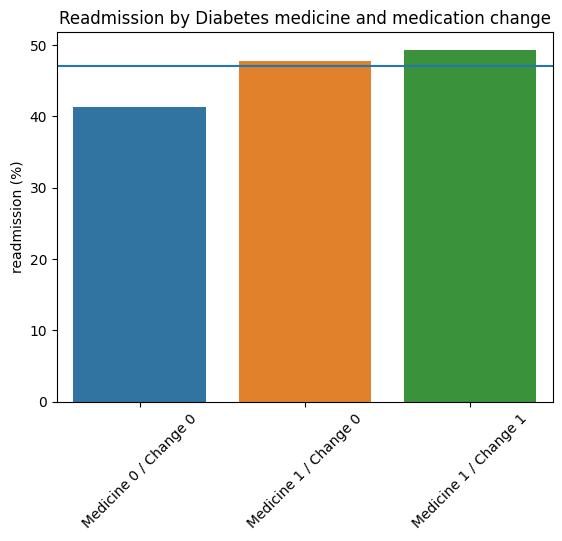

In [320]:
diabetes_med = diabetes_med.reset_index()
graph = sns.barplot(data = diabetes_med, x = diabetes_med.index, y = 'readmission (%)')
graph.set(title = 'Readmission by Diabetes medicine and medication change')
graph.axhline(47)
labels = ['Medicine 0 / Change 0', 'Medicine 1 / Change 0', 'Medicine 1 / Change 1']
graph.set_xticklabels(labels)

plt.xticks(rotation=45)
plt.show()

## History of hospital visits

Here we will work with 3 types of hospital visits:

- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay

But what that means?
An inpatient is a hospital patient who, in most cases, stays in the hospital overnight and meets a set of clinical criteria. Outpatients are people who receive care or hospital services and return home the same day.

To improve our visualization of the data, we are going to visualize the patients in 3 different groups, those who did NOT visit the hospital, those who came only once and those who came more than once

In [306]:
# Separating the variables that indicate the number of visits to the hospital before the period
visitas = dados[['n_inpatient', 'n_emergency', 'n_outpatient', 'readmitted']]
visitas.head()

# We are configuring our dataframe to replace all the lines that have more than 1 visit with the number 2,
# this way we will have the group 0 that indicates no visit, group 1 that indicates 1 visit and group 2 that indicates 2 or more visits.

lista = np.array(visitas.values.tolist())
lista = np.unique(lista)
lista = np.delete(lista, [0,1])
visitas = visitas.replace(lista, 2)



In [321]:
n_inpatient = visitas.groupby(['n_inpatient'])['readmitted'].agg(['sum', 'count'])
n_inpatient['readmission (%)'] = round(n_inpatient['sum'] / n_inpatient['count'],4)*100
n_inpatient['participation (%)'] = round(n_inpatient['count'] / amostra,4)*100
#retorno.sort_values(by = ['n_inpatient'], ascending = False)
n_inpatient

,sum,count,readmission (%),participation (%)
n_inpatient,,,,
0,6592,16537,39.86,66.15
1,2696,4926,54.73,19.70
2,2466,3537,69.72,14.15


Regarding 'n_inpatient', 2/3 of patients have no history of visiting the hospital in the previous year and this group has only a ~39.9% chance of being readmitted

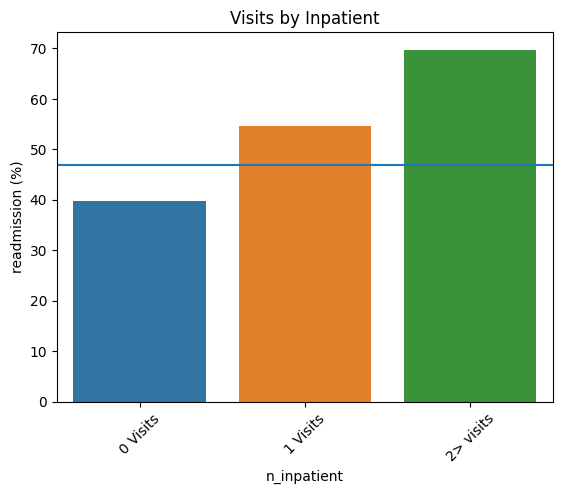

In [323]:

graph_n_inpatient = sns.barplot(data = n_inpatient, x = n_inpatient.index, y = 'readmission (%)')
graph_n_inpatient.axhline(47)
graph_n_inpatient.set(title = 'Visits by Inpatient')
labels = ['0 Visits', '1 Visits', '2> visits']
graph_n_inpatient.set_xticklabels(labels)

plt.xticks(rotation=45)
plt.show()

In [324]:

n_outpatient = visitas.groupby(['n_outpatient'])['readmitted'].agg(['sum', 'count'])
n_outpatient['readmission (%)'] = round(n_outpatient['sum'] / n_outpatient['count'],4)*100
n_outpatient['participation (%)'] = round(n_outpatient['count'] / amostra,4)*100
n_outpatient


,sum,count,readmission (%),participation (%)
n_outpatient,,,,
0,9263,20859,44.41,83.44
1,1213,2076,58.43,8.30
2,1278,2065,61.89,8.26


Regarding 'n_outpatient', ~ 83% of patients have no history of visiting the hospital in the previous year and this group has a readmission rate close to the average.

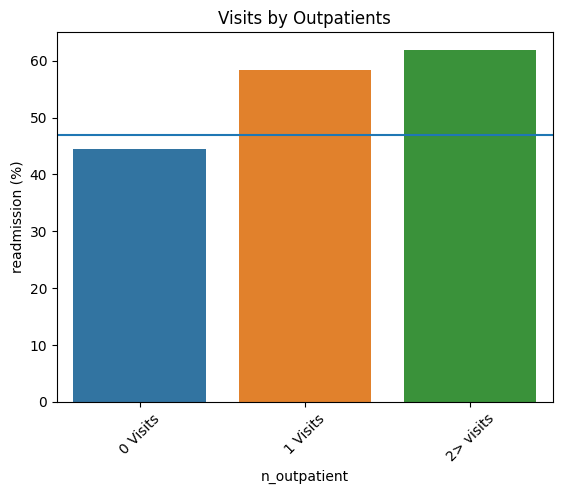

In [325]:

graph_n_outpatient = sns.barplot(data = n_outpatient, x = n_outpatient.index, y = 'readmission (%)')
graph_n_outpatient.set(title = 'Visits by Outpatients')
graph_n_outpatient.axhline(47)
labels = ['0 Visits', '1 Visits', '2> visits']
graph_n_outpatient.set_xticklabels(labels)

plt.xticks(rotation=45)
plt.show()

In [326]:

n_emergency = visitas.groupby(['n_emergency'])['readmitted'].agg(['sum', 'count'])
n_emergency['readmission (%)'] = round(n_emergency['sum'] / n_emergency['count'],4)*100
n_emergency['participation (%)'] = round(n_emergency['count'] / amostra,4)*100
n_emergency


,sum,count,readmission (%),participation (%)
n_emergency,,,,
0,10037,22272,45.07,89.09
1,1087,1842,59.01,7.37
2,630,886,71.11,3.54


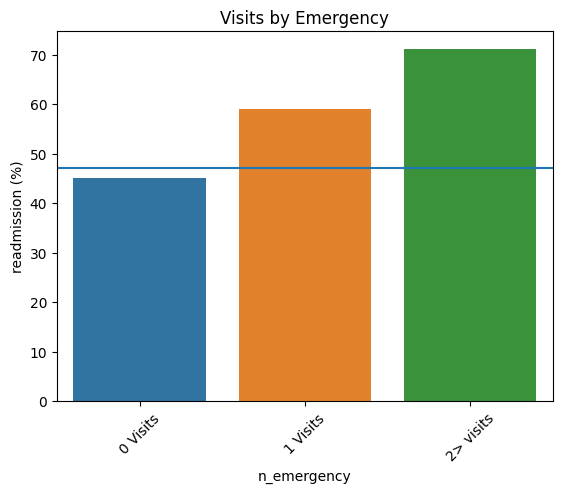

In [327]:

graph_n_emergency = sns.barplot(data = n_emergency, x = n_emergency.index, y = 'readmission (%)')
graph_n_emergency.axhline(47)
graph_n_emergency.set(title = 'Visits by Emergency')
labels = ['0 Visits', '1 Visits', '2> visits']
graph_n_emergency.set_xticklabels(labels)

plt.xticks(rotation=45)
plt.show()

Regarding 'n_emergency',~ 89% of patients have no history of visiting the hospital in the previous year and this group has a readmission rate close to the average.

But here we have an excellent indicator for doctors to be aware of. Patients who go to the hospital, regardless of the format, have a very high chance of being readmitted again.
Now patients who have 2 or more visits to the hospital, regardless of the format, have a very high chance of being seen again.

What happens to the patients in this hospital? Having already been there is a big red flag

# Summary

Okay, now let's summarize all the observations coming from the individual analysis of each feature

- "time_in_hospital" - Spending fewer days in the hospital is less likely to return to it
- "n_procedures" - More medical procedures iquals to less chance of being readmitted
- "n_medications" - Less medication iquals to less chance of being readmitted
- "n_outpatient" and "n_inpatient" and "n_emergency" - Patients who already make visits of this natures have a very high chance of returning to the hospital again
- "diag_1" - 'Musculoskeletal' and 'Injury' problems have the lowest return rate, whereas 'Diabetes' are the group that is readmitted the most
- "glucose_test" - Patients with a high 'glucose_test' are more likely to return
- "change"/"diabetes_med" - Diabetes represents a risk group
- "age" - Nothing that stands out
- "n_lab_procedures" - Nothing that stands out
- "A1Ctest" - Nothing that stands out



# Time do answer de questions
## After our analysis of each variable independently, we turn to the proposed questions.
### 1. What is the most common primary diagnosis by age group? 

In [328]:
# 1. What is the most common primary diagnosis by age group? 

age = dados.groupby(['age' , 'diag_1'])['diag_1'].agg(['count'])
age['readmission (%)'] = round(age['count'] / amostra,4)*100
age.reset_index(inplace = True)
age.sort_values(by = 'count', ascending = False).drop_duplicates(subset = ['age']).sort_values(by = 'age')

,age,diag_1,count,readmission (%)
5,0,Other,750,3.00
7,1,Circulatory,1256,5.02
14,2,Circulatory,1962,7.85
22,3,Circulatory,2392,9.57
30,4,Circulatory,1482,5.93
38,5,Circulatory,228,0.91


As noted in the notes related to diagnoses, most of the cases in 'diag_1' are circulatory problems. This same pattern is observed here in the distribution, apart from group 0, all other age groups are circulatory problems

### 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

In [329]:
# 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.
qtd_diab = len(dados.loc[ dados.diag_1 == 'Diabetes']) 
print('From {} total pacients, {} had Diabetes as primary diagnoses'.format(amostra, qtd_diab))

From 25000 total pacients, 1747 had Diabetes as primary diagnoses


In [330]:
dados_Diabebetes = dados.loc[ dados.diag_1 == 'Diabetes']
dados_semDiabebetes = dados.loc[ dados.diag_1 != 'Diabetes']


In [331]:

juntos = pd.DataFrame()
juntos['cat'] = dados_Diabebetes.mean().index
juntos['Diabetes'] = dados_Diabebetes.mean().values
juntos['NoDiabetes'] = dados_semDiabebetes.mean().values
juntos['dif - %'] = round(juntos['Diabetes'] / juntos['NoDiabetes'] - 1,2)
juntos


C:\Users\andre\AppData\Local\Temp\ipykernel_44892\832551655.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  juntos['cat'] = dados_Diabebetes.mean().index
C:\Users\andre\AppData\Local\Temp\ipykernel_44892\832551655.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  juntos['Diabetes'] = dados_Diabebetes.mean().values
C:\Users\andre\AppData\Local\Temp\ipykernel_44892\832551655.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specif

,cat,Diabetes,NoDiabetes,dif - %
0,age,1.838580,2.382101,-0.23
1,time_in_hospital,4.807098,4.426741,0.09
2,n_lab_procedures,45.662278,43.058831,0.06
3,n_procedures,1.057813,1.374489,-0.23
4,n_medications,15.448197,16.312820,-0.05
5,n_outpatient,0.512879,0.355395,0.44
6,n_inpatient,0.764167,0.604825,0.26
7,n_emergency,0.281053,0.179504,0.57
8,change,0.593589,0.450092,0.32
9,diabetes_med,0.843732,0.763514,0.11


And what does this table show us?
We separated the dataframe between diabetic and non-diabetic patients.
After that, we created a column with the percentage difference between the other categories and with them we can observe a difference in the behavior of the patients

* Diabetes pacients are younger;
* They do less lab procedures;
* They have a history of more previous visits to the hopistal, in any category;
* They have 15% more readmission rate;

### 3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

This question is a bit tricky, because according to what we saw throughout our analysis, the patients who are more likely to return to the hospital are patients who have already visited the hospital before.

Let's create a risk indicator.
We originally made the following changes in columns :n_outpatient, n_inpatient, n_emergency

For values equal to 0, we kept 0, for values equal to 1, we kept 1, for values equal to or greater than 2, we replaced them all with 2. In this way, an indicator was created in each of this category:
* 0 -> No visit
* 1-> 1 visit
* 2 -> 2 or more visits

With this change, we created the risk indicator, which is basically the sum of the 3 columns, ranging from 0 (0 + 0 +0) to 6 (2 + 2 + 2).

This indicator will be the fundamental piece in the follow-up that the hospital will do with its patients, regardless of the diagnosis.

In [332]:
# Here we will create a new DataFrame, data2, where we will adopt the reasoning used previously, where we will replace the number of visits in outpatient, 
# inpatient and emergency, in 0, 1 or 2.
dados2 = dados.join(visitas, rsuffix = '_ajusted')
dados2.drop(columns = ['n_outpatient', 'n_inpatient', 'n_emergency'], inplace = True)
dados2['risk'] = dados2['n_inpatient_ajusted']  +  dados2['n_emergency_ajusted'] + dados2['n_outpatient_ajusted']
dados2


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,n_inpatient_ajusted,n_emergency_ajusted,n_outpatient_ajusted,readmitted_ajusted,risk
0,3,8,72,1,18,Missing,Circulatory,Respiratory,Other,0,0,0,1,0,0,0,2,0,2
1,3,3,34,2,13,Other,Other,Other,Other,0,0,0,1,0,0,0,0,0,0
2,1,5,45,0,18,Missing,Circulatory,Circulatory,Circulatory,0,0,1,1,1,0,0,0,1,0
3,3,2,36,0,12,Missing,Circulatory,Other,Diabetes,0,0,1,1,1,0,0,1,1,1
4,2,1,42,0,7,InternalMedicine,Other,Circulatory,Respiratory,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,14,77,1,30,Missing,Circulatory,Other,Circulatory,0,normal,0,0,1,0,0,0,1,0
24996,4,2,66,0,24,Missing,Digestive,Injury,Other,0,high,1,1,1,0,0,0,1,0
24997,3,5,12,0,6,Missing,Other,Other,Other,normal,0,0,0,1,1,0,0,1,1
24998,3,2,61,3,15,Family/GeneralPractice,Respiratory,Diabetes,Other,0,0,1,1,0,0,0,0,0,0


In [333]:

risk = dados2.groupby(['risk'])['readmitted'].agg(['sum', 'count'])
risk['readmission (%)'] = round(risk['sum'] / risk['count'],4)*100
risk['participation (%)'] = round(risk['count'] / amostra,4)*100
#retorno.sort_values(by = ['n_inpatient'], ascending = False)
risk


,sum,count,readmission (%),participation (%)
risk,,,,
0,5135,13693,37.50,54.77
1,2525,4958,50.93,19.83
2,2314,3807,60.78,15.23
3,889,1362,65.27,5.45
4,619,840,73.69,3.36
5,184,238,77.31,0.95
6,88,102,86.27,0.41


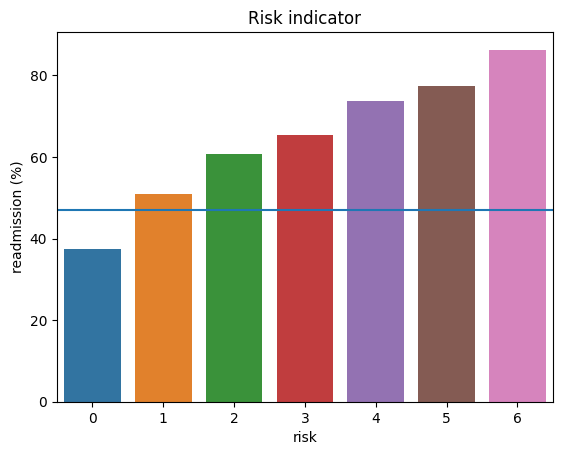

In [336]:

graph_risk = sns.barplot(data = risk, x = risk.index, y = 'readmission (%)')
graph_risk.axhline(47)
graph_risk.set(title = 'Risk indicator')

plt.show()

My suggestion to physicians is that, after treating the patient, they apply a questionnaire about previous visits to the hospital and, with this information, establish criteria for follow-up and care.